# <font  color=blue>Análise de Sentimento no Twitter</font>

In [18]:
import tweepy 
import pandas as pd     
import numpy as np 
from textblob import TextBlob as tb
import time
import re
import matplotlib.pyplot as plt
from geopy.geocoders import Nominatim
import folium
from folium import plugins
from wordcloud import WordCloud, STOPWORDS

In [19]:
consumer_key    = ''
consumer_secret = ''
access_token    = ''
access_token_secret  = ''

In [20]:
auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_token_secret)
api = tweepy.API(auth,wait_on_rate_limit=True,wait_on_rate_limit_notify=True,retry_count=5)

In [21]:
tweets = []
info = []
keyword = ("home office")

In [28]:
from googletrans import Translator
from unidecode import unidecode

polarities = []

for tweet in tweepy.Cursor(api.search,q=keyword, tweet_mode='extended',
                           rpp=50,lang="pt",
                           include_entities=True).items(50):
    textPT = unidecode(tweet.full_text)
    textEN = Translator().translate(textPT)
    polarityPT = tb(textEN.text).sentiment.polarity 
    polaritiesPT.append(polarityPT)
         
    if 'retweeted_status' in dir(tweet):
        aux=tweet.retweeted_status.full_text
    else:
        aux=tweet.full_text
        
    newtweet = aux.replace("\n", " ")
   
    tweets.append(newtweet)
    info.append(tweet)
    
    #file = open("tweets_Keyword_covid_10.txt", "a", -1, "utf-8")
    file = open("tweets_Home_Oficce.txt", "a", -1, "utf-8")    
    file.write(newtweet+'\n')
    file.close()

In [29]:
# Para verificar a quantidade de tweets coletado use a função "len()"

print("Total de tweets coletados %s." % (len(info)))

Total de tweets coletados 50.


In [30]:
tweets_df = pd.DataFrame(tweets, columns=['Tweets']) 

tweets_df['len']  = np.array([len(tweet) for tweet in tweets])
tweets_df['ID']   = np.array([tweet.id for tweet in info])
tweets_df['USER']   = np.array([tweet.user.screen_name for tweet in info])
tweets_df['userName'] = np.array([tweet.user.name for tweet in info])
tweets_df['User Location']    = np.array([tweet.user.location for tweet in info])
tweets_df['Language'] = np.array([tweet.user.lang for tweet in info])
tweets_df['Date'] = np.array([tweet.created_at for tweet in info])
tweets_df['Source'] = np.array([tweet.source for tweet in info])
tweets_df['Likes']  = np.array([tweet.favorite_count for tweet in info])
tweets_df['Retweets']    = np.array([tweet.retweet_count for tweet in info])
tweets_df['Geo']    = np.array([tweet.geo for tweet in info])
tweets_df['Coordinates']    = np.array([tweet.coordinates for tweet in info])         
tweets_df['Place']    = np.array([tweet.place for tweet in info])

tweets_df.to_csv("tweets_Home_Oficce_50.csv")

In [31]:
tweets_df.head()

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Home office é bom demais pra poder gritar CH...,109,1292236046986612738,amandakemii,Amanda Akemi,"São Paulo, SP",None,2020-08-08 23:07:36,Twitter for iPhone,0,13924,None,None,None
1,#JOGAEMCASA É muito interessante os comentári...,231,1292235583817945088,pacobuenoneto,Paco Bueno Neto,,None,2020-08-08 23:05:46,Twitter for Android,0,0,None,None,None
2,💡✨THREAD DA SEMANA: IDEIAS ECONÔMICAS PARA REP...,273,1292235031495225345,annakendri,Annak is proud of 1D&ID Δ,𝖕𝖗𝖎𝖓𝖈𝖊𝖘𝖘 𝖕𝖆𝖗𝖐,None,2020-08-08 23:03:34,Twitter for Android,0,2,None,None,None
3,"Cortei, pintei de verde metálico. Mimos que o ...",72,1292234489029066759,gaumatos,Gláucia Matos,Minas Gerais,None,2020-08-08 23:01:25,Twitter for Android,0,0,None,None,None
4,💡✨THREAD DA SEMANA: IDEIAS ECONÔMICAS PARA REP...,273,1292233986677313536,umreIicario,ananda,"Belém, Brasil",None,2020-08-08 22:59:25,Twitter for Android,0,2,None,None,None


In [32]:
# Tweets com maior número de LIKES
likes_max = np.max(tweets_df['Likes'])
likes = tweets_df[tweets_df.Likes == likes_max].index[0] 
print("O tweet com mais curtidas (likes) é: \n{}".format(tweets_df['Tweets'][likes]))
print("Número de curtidas: {}".format(likes_max))


O tweet com mais curtidas (likes) é: 
Vou deixar anotado aqui pra marcar o dia de hoje porque estabeleci como meta principal de carreira conseguir trabalhar home office pra poder morar no mato Toda cez q eu reclamar  home office ou tiver em crise vou catar essa foto pra lembrar q foi nesse dia q eu decidi isso https://t.co/A81rIhMDVb
Número de curtidas: 6


In [35]:
# Tweets com maior número de RETWEETS
retweet_max  = np.max(tweets_df['Retweets']) 
print("O tweet com mais retweet é: \n{}".format(tweets_df['Tweets'][retweet]))
print("Número de retweets: {}".format(retweet_max))

O tweet com mais retweet é: 
Home office é bom demais pra poder gritar   CHATA  CHAAATA MEU DEUS QUE GENTE CHAAATA   Com vigor e liberdade
Número de retweets: 13924


In [36]:
sources = [] #lista para armazenar a fontes
for source in tweets_df['Source']:
    if source not in sources:
        sources.append(source) 
percent = np.zeros(len(sources)) 
for source in tweets_df['Source']:
    for index in range(len(sources)):
        if source == sources[index]:
            percent[index] += 1
            pass

In [37]:
sourceDF = pd.DataFrame({
 'source':percent,
}, index=sources)
sourceDF

,source
Twitter for iPhone,14.0
Twitter for Android,24.0
Twitter Web App,10.0
Instagram,1.0
EmpregoBrasil,1.0


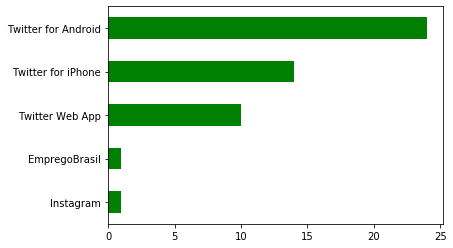

In [40]:
sources_sorted = sourceDF.sort_values('source',ascending=True)
ax = sources_sorted.source.plot(kind='barh',color='GREEN')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

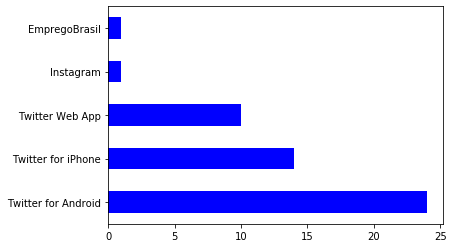

In [42]:
sources_sorted = sourceDF.sort_values('source',ascending=False)
ax = sources_sorted.source.plot(kind='barh',color='BLUE')
ax.get_xaxis().set_major_formatter(plt.FuncFormatter(lambda x, loc: "{:,}".format(int(x))))

In [43]:
analysis = None
polarities = []

In [47]:
#analisando a polaridade
for tweet in tweets_df['Tweets']:    
    analysis = tb(tweet)
    polarity = analysis.sentiment.polarity 
    polarities.append(polarity)

In [48]:
tweets_df.head(3)

,Tweets,len,ID,USER,userName,User Location,Language,Date,Source,Likes,Retweets,Geo,Coordinates,Place
0,Home office é bom demais pra poder gritar CH...,109,1292236046986612738,amandakemii,Amanda Akemi,"São Paulo, SP",None,2020-08-08 23:07:36,Twitter for iPhone,0,13924,None,None,None
1,#JOGAEMCASA É muito interessante os comentári...,231,1292235583817945088,pacobuenoneto,Paco Bueno Neto,,None,2020-08-08 23:05:46,Twitter for Android,0,0,None,None,None
2,💡✨THREAD DA SEMANA: IDEIAS ECONÔMICAS PARA REP...,273,1292235031495225345,annakendri,Annak is proud of 1D&ID Δ,𝖕𝖗𝖎𝖓𝖈𝖊𝖘𝖘 𝖕𝖆𝖗𝖐,None,2020-08-08 23:03:34,Twitter for Android,0,2,None,None,None


In [49]:
print('Vetor de polaridade:',polarities)

Vetor de polaridade: [0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.15, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]


In [51]:
print('Para a palavra:"%s"' % keyword)
print('A MÉDIA DE SENTIMENTO É: ' + str(np.mean(polarities)))

Para a palavra:"home office"
A MÉDIA DE SENTIMENTO É: 0.0029999999999999996


In [52]:
positive = 0
negative = 0
neutral = 0
for polarity in polarities:
    if polarity > 0:
        positive = positive+1
    elif polarity < 0:
        negative = negative+1
    else:
        neutral = neutral+1                           

In [53]:
print("Tweets Positivos: %s" % positive)
print("Tweets Negativos: %s" % negative)
print("Tweets Neutros: %s" % neutral)

Tweets Positivos: 3
Tweets Negativos: 0
Tweets Neutros: 147


In [54]:
#calcula percentual
pos_pct=positive*100/len(polarities)
neg_pct=negative*100/len(polarities)
neu_pct=neutral*100/len(polarities)

In [55]:
sentiments = ['Positivos', 'Negativos','Neutros']
percents = [pos_pct, neg_pct, neu_pct]

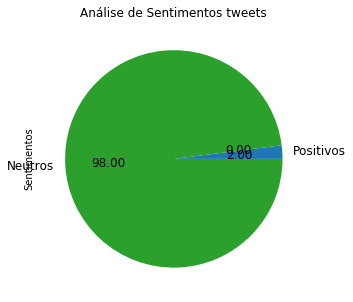

In [56]:
pie_chart = pd.Series(percents, index=sentiments,name='Sentimentos')
pie_chart.plot.pie(fontsize=12, autopct='%.2f', figsize=(5, 5),title="Análise de Sentimentos tweets");

In [58]:
geolocator = Nominatim(user_agent="TweeterSentiments")
latitude = []
longitude = []
for user_location in tweets_df['User Location']:
    try:
        location = geolocator.geocode(user_location)
        latitude.append(location.latitude)
        longitude.append(location.longitude)
    except:
        continue

In [59]:
coordenadas = np.column_stack((latitude, longitude))

mapa = folium.Map(zoom_start=3.)
mapa.add_child(plugins.HeatMap(coordenadas))
mapa.save('covid.html')
mapa

In [60]:
words = ' '.join(tweets_df['Tweets'])
words_clean = " ".join([word for word in words.split()
                            if 'https' not in word
                                and not word.startswith('@')
                                and word != 'RT'
                            ])

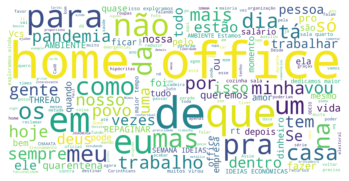

In [61]:
import warnings
warnings.simplefilter('ignore')
wc = WordCloud(min_font_size=10, 
               max_font_size=300, 
               background_color='white', 
               mode="RGB",
               width=2000, 
               height=1000,
               normalize_plurals= True).generate(words_clean)

plt.imshow(wc, interpolation="bilinear")
plt.axis("off")
plt.savefig('covid_clound.png', dpi=300)
plt.show()